Now we empirically explore how model complexity effects test and train accuracy.

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
data = load_iris()
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data.data, data.target, test_size=0.2)

We will choose only 2 features for better visuzlization.

In [2]:
features = [0,1]
xtrain, xtest = xtrain[:, features], xtest[:,  features]
print(xtrain.shape)
print(xtest.shape)

(120, 2)
(30, 2)


One way to control complexity of Decision tree is by limiting maximim depth of the tree.

In [3]:
depths = [2, 3, 4,5, 6,7, 8, 9]

x0max, x0min = xtrain[:,features[0]].max()+1, xtrain[:,features[0]].min() -1
x1max, x1min = xtrain[:,features[1]].max()+1, xtrain[:,features[1]].min() - 1

x0, x1 = np.meshgrid(np.arange(x0min, x0max, 0.01), np.arange(x1min, x1max, 0.01))
print(x0.shape)
print(x1.shape)

(420, 560)
(420, 560)


We plot the decision curve for each depth and recored train and test accuracy.

<IPython.core.display.Javascript object>


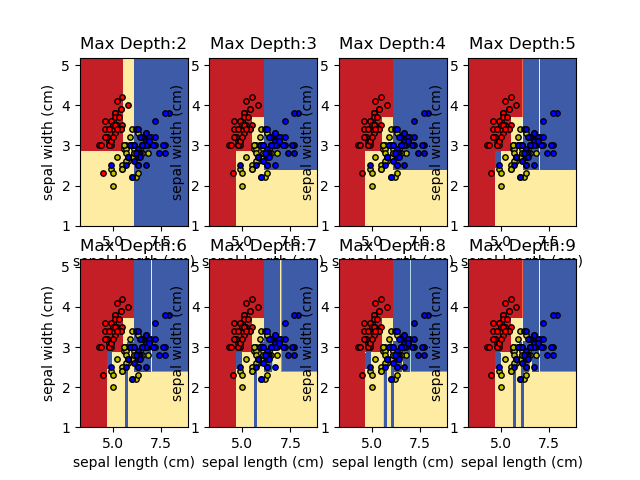

In [5]:
from sklearn.metrics import f1_score
train_f1 = []
test_f1 = []

import matplotlib.pyplot as plt
%matplotlib notebook

for i,d in enumerate(depths):
    # Train the model
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(xtrain, ytrain)
    z = model.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
    
    # Plot the decision boundary
    plt.subplot(2,4,i+1)
    plt.contourf(x0, x1, z, cmap=plt.cm.RdYlBu)
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.title("Max Depth:%d"%(d))
    
    # Store F1 Scores
    train_f1.append(f1_score(ytrain, model.predict(xtrain), average='micro'))
    test_f1.append(f1_score(ytest, model.predict(xtest), average='micro'))
    
    for i, color in zip(range(3), 'ryb'):
        idx = np.where(ytrain == i)
        plt.scatter(xtrain[idx, features[0]], xtrain[idx, features[1]], c=color, label=data.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.show()

More the allowed maximum depth, more complex is the decision boundary learnt.

If model is too complex, it will **overfit** to the training data.

<IPython.core.display.Javascript object>


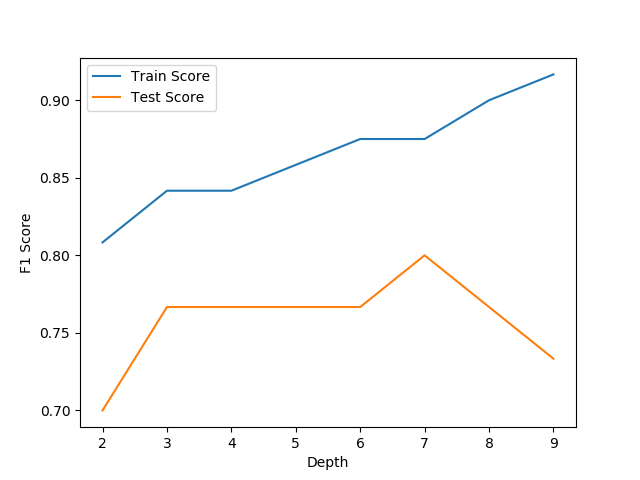

In [6]:
plt.figure(2)
plt.clf()
plt.xlabel("Depth")
plt.ylabel("F1 Score")
plt.plot(depths, train_f1, label='Train Score')
plt.plot(depths, test_f1, label="Test Score")
plt.legend()

## Exercises
1. Train a K-nearest neighbor model on iris dataset.
2. Visualize the decision boundaries.
3. How does test and train scores vary with different values of $k$? Why?